<a href="https://colab.research.google.com/github/melihkurtaran/MachineLearning/blob/main/UnsupervisedLearning/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning Project**

Author: Melih Kurtaran

In [48]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score, completeness_score
from sklearn.decomposition import PCA

My group number is 9 so the classes I use 0, 4 and 8.

In [15]:
# Load the digits dataset
digits = load_digits()

# Create a boolean mask for the samples that correspond to class 0, 4, 8
mask = (digits.target == 0) | (digits.target == 4) | (digits.target == 8)

# Apply the mask to the data and target arrays
X = digits.data[mask]
y = digits.target[mask]

Plotting examples from each class

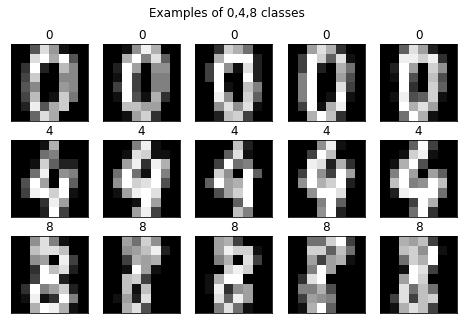

In [16]:
#Select some examples of each class
examples_0 = X[y == 0][:5]
examples_4 = X[y == 4][:5]
examples_8 = X[y == 8][:5]

# Plot the examples
fig, axes = plt.subplots(3, 5, figsize=(8, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle("Examples of 0,4,8 classes")
for ax, example in zip(axes[0], examples_0):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("0")
for ax, example in zip(axes[1], examples_4):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("4")
for ax, example in zip(axes[2], examples_8):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("8")

plt.show()

# **T1**

## **a) Cluster the dataset**

Clustering the dataset for m = 3 clusters, the Euclidean distance and the complete linkage, the average
linkage and the ward algorithms. Reporting on the performance attained by each clustering method using the
v-measure.

In [17]:
# function for training different models
def cluster_and_evaluate(X, y, model, linkage=None):
    """
    Cluster the data using the specified model and linkage, and evaluate the performance using v-measure.
    :param X: The input data.
    :param y: The true labels.
    :param model: The clustering model to use.
    :param linkage: The linkage method to use for agglomerative clustering.
    :return: The v-measure score.
    """
    if model == "kmeans":
        clusterer = KMeans(n_clusters=3)
    elif model == "agg":
        clusterer = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    else:
        raise ValueError("Invalid model")
    
    # Fit the model to the data
    clusterer.fit(X)
    
    # Get the cluster labels
    labels = clusterer.labels_
    
    # Compute the v-measure score
    v_measure = v_measure_score(y, labels)
    
    return v_measure

In [18]:
# Cluster and evaluate KMeans with the Euclidean distance
kmeans_v_measure = cluster_and_evaluate(X, y, "kmeans")
print("KMeans v-measure with the Euclidean distance:", kmeans_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'complete'
agg_complete_v_measure = cluster_and_evaluate(X, y, "agg", linkage='complete')
print("AgglomerativeClustering with linkage 'complete' v-measure:", agg_complete_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'average'
agg_average_v_measure = cluster_and_evaluate(X, y, "agg", linkage='average')
print("AgglomerativeClustering with linkage 'average' v-measure:", agg_average_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'ward'
agg_ward_v_measure = cluster_and_evaluate(X, y, "agg", linkage='ward')
print("AgglomerativeClustering with linkage 'ward' v-measure:", agg_ward_v_measure)

KMeans v-measure with the Euclidean distance: 0.9340007391665218
AgglomerativeClustering with linkage 'complete' v-measure: 0.6532613395268002
AgglomerativeClustering with linkage 'average' v-measure: 0.9447217560421027
AgglomerativeClustering with linkage 'ward' v-measure: 0.9739706119388045


It is seen that best performing one is The AgglomerativeClustering algorithm with linkage 'ward'

In [19]:
# choose the best performing algorithm
best_algorithm = max(kmeans_v_measure,agg_complete_v_measure,agg_average_v_measure,agg_ward_v_measure)

s = " is the best performing method with a v-measure score of {:.4f}"

if best_algorithm == kmeans_v_measure:
    print("The KMeans algorithm" + s.format(kmeans_v_measure))
elif best_algorithm == agg_complete_v_measure:
    print("The AgglomerativeClustering algorithm with linkage 'complete'" 
          + s.format(agg_complete_v_measure))
elif best_algorithm == agg_average_v_measure:
    print("The AgglomerativeClustering algorithm with linkage 'average'" 
          + s.format(agg_average_v_measure))
else:
    print("The AgglomerativeClustering algorithm with linkage 'ward'" 
          + s.format(agg_ward_v_measure))


The AgglomerativeClustering algorithm with linkage 'ward' is the best performing method with a v-measure score of 0.9740


## **b) Trying out different number of clusters**

For the best performing algorithm, reporting on its performance using again the v-measure and for m = 2, 3, 4 and 5 clusters.

In [20]:
best_v_measure = 0
best_n_clusters = 0
for n_clusters in [2, 3, 4, 5]:
    agg_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_ward.fit(X)
    labels = agg_ward.labels_
    v_measure = v_measure_score(y, labels)
    print("For {} clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of {:.4f}".format(n_clusters, v_measure))
    if v_measure > best_v_measure:
        best_v_measure = v_measure
        best_n_clusters = n_clusters
print("The best performance corresponds to {} clusters with a v-measure of {:.4f}".format(best_n_clusters, best_v_measure))


For 2 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.7341
For 3 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.9740
For 4 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.8829
For 5 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.8125
The best performance corresponds to 3 clusters with a v-measure of 0.9740


It is clearly seen that the best performance correspond to m = 3

## **c) Contingency Matrix and reporting measures**

Contingency Matrix is shown

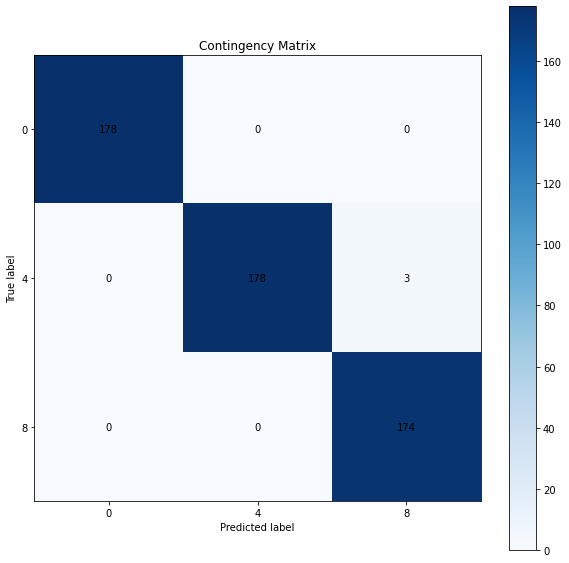

In [21]:
# Compute the contingency matrix for m=3
agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_ward.fit(X)
labels = agg_ward.labels_

#to map classes to its corresponding label
labels = np.where(labels == 0, 4, labels)
labels = np.where(labels == 1, 0, labels)
labels = np.where(labels == 2, 8, labels)

contingency_matrix = confusion_matrix(y, labels)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Plot the contingency matrix with a color map
plt.imshow(contingency_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers to the cells
for i in range(3):
    for j in range(3):
        plt.text(j, i, contingency_matrix[i, j], ha='center', va='center', color='black')

# Add class names to the x and y axis
class_names = ["0", "4", "8"]
plt.xticks(np.arange(3), class_names)
plt.yticks(np.arange(3), class_names)
plt.title("Contingency Matrix")

plt.show()

In [22]:
contingency_matrix

array([[178,   0,   0],
       [  0, 178,   3],
       [  0,   0, 174]])

Identifying the number of incorrectly clustered samples and calculating the percentage of errors

In [23]:
# Identify the number of incorrectly clustered samples
incorrectly_clustered_samples = np.sum(contingency_matrix) - np.sum(np.diag(contingency_matrix))
total_samples = np.sum(contingency_matrix)
percentage_errors = incorrectly_clustered_samples / total_samples

print("The number of incorrectly clustered samples is {} out of {} ({:.2f}% error)"
.format(incorrectly_clustered_samples, total_samples, (percentage_errors*100)))


The number of incorrectly clustered samples is 3 out of 533 (0.56% error)


Reporting on the homogeneity and the completeness measures

In [24]:
# Compute homogeneity and completeness measures
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)

print("Homogeneity measure: {:.4f}".format(homogeneity))
print("Completeness measure: {:.4f}".format(completeness))

Homogeneity measure: 0.9740
Completeness measure: 0.9739


## **d) Plotting the mistakes**

Only 3 samples are clustered incorrectly and those are 4 values that is confused as 8 values by the model.

In [25]:
# Find the indexes of misclassified samples
misclassified_indexes = np.where(y != labels)[0]
misclassified_indexes

array([478, 482, 489])

Samples from class 4 clustered as class 8

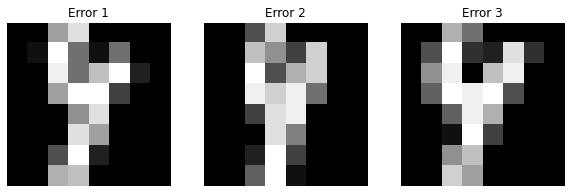

In [26]:
fig, axes = plt.subplots(1, len(misclassified_indexes), figsize=(10, 3))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[misclassified_indexes[i]].reshape(8,8), cmap='gray')
    ax.set_title(f'Error ' + str(i+1) )
    ax.axis('off')
plt.show()


# **T2**

Importing fuzzy_kmeans.py file

In [50]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 13 19:46:53 2023

@author: Alberto Ortiz (modified from Mathieu Blondel, https://gist.github.com/mblondel/1451300)
"""

import numpy as np
from sklearn.base import BaseEstimator
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import euclidean_distances

class KMeans(BaseEstimator):

    def __init__(self, k, max_iter=100, random_state=0, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        self.tol = tol

    def _e_step(self, X):
        self.labels_ = euclidean_distances(X, self.cluster_centers_,
                                     squared=True).argmin(axis=1)

    def _average(self, X):
        return X.mean(axis=0)

    def _m_step(self, X):
        X_center = None
        for center_id in range(self.k):
            center_mask = self.labels_ == center_id
            if not np.any(center_mask):
                # The centroid of empty clusters is set to the center of
                # everything
                if X_center is None:
                    X_center = self._average(X)
                self.cluster_centers_[center_id] = X_center
            else:
                self.cluster_centers_[center_id] = \
                    self._average(X[center_mask])

    def fit(self, X, y=None):
        n_samples = X.shape[0]
        vdata = np.mean(np.var(X, 0))

        random_state = check_random_state(self.random_state)
        self.labels_ = random_state.permutation(n_samples)[:self.k]
        self.cluster_centers_ = X[self.labels_]

        for i in range(self.max_iter):
            centers_old = self.cluster_centers_.copy()

            self._e_step(X)
            self._m_step(X)

            if np.sum((centers_old - self.cluster_centers_) ** 2) < self.tol * vdata:
                break

        return self

    def predict(self, X):
        labels = euclidean_distances(X, self.cluster_centers_,
                                     squared=True).argmin(axis=1)
        return labels

class FuzzyKMeans(KMeans):

    def __init__(self, k, m=2, max_iter=100, random_state=0, tol=1e-4):
        """
        m > 1: fuzzy-ness parameter
        The closer to m is 1, the closter to hard kmeans.
        The bigger m, the fuzzier (converge to the global cluster).
        """
        self.k = k
        assert m > 1
        self.m = m
        self.max_iter = max_iter
        self.random_state = random_state
        self.tol = tol

    def _e_step(self, X):
        D = 1.0 / euclidean_distances(X, self.cluster_centers_, squared=True)
        D **= 1.0 / (self.m - 1)
        D /= np.sum(D, axis=1)[:, np.newaxis]
        # shape: n_samples x k
        self.fuzzy_labels_ = D
        self.labels_ = self.fuzzy_labels_.argmax(axis=1)

    def _m_step(self, X):
        weights = self.fuzzy_labels_ ** self.m
        # shape: n_clusters x n_features
        self.cluster_centers_ = np.dot(X.T, weights).T
        self.cluster_centers_ /= weights.sum(axis=0)[:, np.newaxis]

    def fit(self, X, y=None):
        n_samples, n_features = X.shape
        vdata = np.mean(np.var(X, 0))

        random_state = check_random_state(self.random_state)
        self.fuzzy_labels_ = random_state.rand(n_samples, self.k)
        self.fuzzy_labels_ /= self.fuzzy_labels_.sum(axis=1)[:, np.newaxis]
        self._m_step(X)

        for i in range(self.max_iter):
            centers_old = self.cluster_centers_.copy()

            self._e_step(X)
            self._m_step(X)

            if np.sum((centers_old - self.cluster_centers_) ** 2) < self.tol * vdata:
                break

        return self
    
    def predict(self, X):
        D = 1.0 / euclidean_distances(X, self.cluster_centers_, squared=True)
        D **= 1.0 / (self.m - 1)
        D /= np.sum(D, axis=1)[:, np.newaxis]
        labels = np.argmax(D, axis=1)
        return labels


## **a) Cluster the dataset**

Clustering the dataset for m = 3 clusters for K-means and Fuzzy K-means
algorithms. 'm' is chosen as 2 since its default is also 2. PCA is used after the clustering to visualize the differences between both models

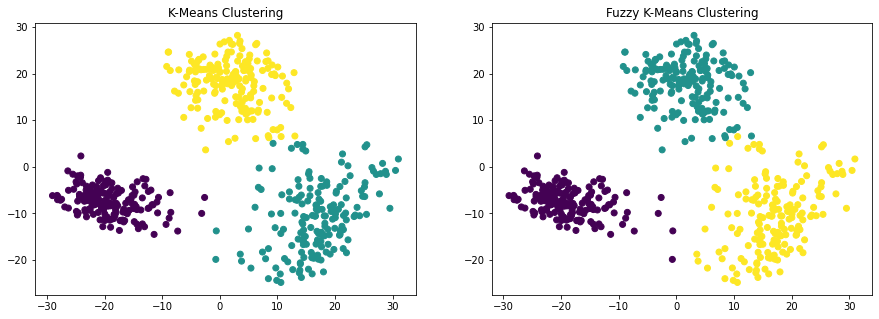

In [102]:
# Instantiate KMeans and FuzzyKMeans classes with 3 clusters (one for each digit)
km = KMeans(k=3)
fkm = FuzzyKMeans(k=3, m=2)

# Fit the KMeans and the FuzzyKMeans models to the dataset
km.fit(X)
fkm.fit(X)

# Predict the cluster labels for the dataset
km_labels = km.predict(X)

# Predict the fuzzy cluster labels for the dataset
fkm_labels = fkm.predict(X)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=km_labels)
ax1.set_title("K-Means Clustering")

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=fkm_labels)
ax2.set_title("Fuzzy K-Means Clustering")

plt.show()

## **b) V-measure Comparison**

In [98]:
# Compute the V-measure for the KMeans model
km_v_measure = v_measure_score(y, km_labels)

# Compute the V-measure for the FuzzyKMeans model
fkm_v_measure = v_measure_score(y, fkm_labels)

print("V-measure for KMeans:", km_v_measure)
print("V-measure for FuzzyKMeans:", fkm_v_measure)

V-measure for KMeans: 0.9258199009420089
V-measure for FuzzyKMeans: 0.9293888534380834


Fuzzy KMeans algorithm has a bit better performance than the regular KMeans algorithm. Therefore Fuzzy KMeans is chosen.

## **c) Trying out different number of clusters**

In [104]:
best_v_measure = 0
best_n_clusters = 0
for n_clusters in [2, 3, 4, 5]:
    fkm = FuzzyKMeans(k=n_clusters, m=2)
    fkm.fit(X)
    labels = fkm.labels_
    v_measure = v_measure_score(y, labels)
    print("For {} clusters, the FuzzyKMeans algorithm has a v-measure of {:.4f}".format(n_clusters, v_measure))
    if v_measure > best_v_measure:
        best_v_measure = v_measure
        best_n_clusters = n_clusters
print("The best performance corresponds to {} clusters with a v-measure of {:.4f}".format(best_n_clusters, best_v_measure))


For 2 clusters, the FuzzyKMeans algorithm has a v-measure of 0.5461
For 3 clusters, the FuzzyKMeans algorithm has a v-measure of 0.9294
For 4 clusters, the FuzzyKMeans algorithm has a v-measure of 0.9094
For 5 clusters, the FuzzyKMeans algorithm has a v-measure of 0.6478
The best performance corresponds to 3 clusters with a v-measure of 0.9294


It is seen that the best number for cluster is 3 as expected. However, it also has a fairly good performance for 4 clusters as well. The possible reason might be that the model clusters the outliers as a 4th additional cluster.

## **d) Contingency Matrix and reporting measures**

Contingency Matrix is shown

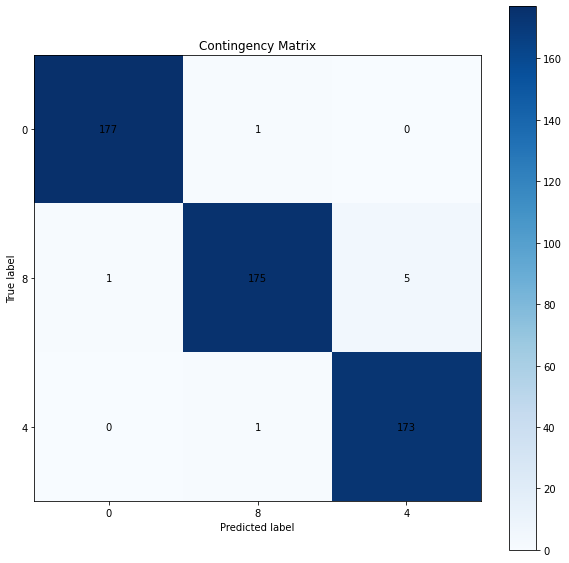

In [114]:
# Compute the contingency matrix for m=3
fkm = FuzzyKMeans(k=3, m=2)
fkm.fit(X)
labels = fkm.labels_

#to map classes to its corresponding label
labels = np.where(labels == 1, 8, labels)
labels = np.where(labels == 2, 4, labels)

contingency_matrix = confusion_matrix(y, labels)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Plot the contingency matrix with a color map
plt.imshow(contingency_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers to the cells
for i in range(3):
    for j in range(3):
        plt.text(j, i, contingency_matrix[i, j], ha='center', va='center', color='black')

# Add class names to the x and y axis
class_names = ["0", "8", "4"]
plt.xticks(np.arange(3), class_names)
plt.yticks(np.arange(3), class_names)
plt.title("Contingency Matrix")

plt.show()

In [115]:
contingency_matrix

array([[177,   1,   0],
       [  1, 175,   5],
       [  0,   1, 173]])

Reporting on the homogeneity and the completeness measures

In [116]:
# Identify the number of incorrectly clustered samples
incorrectly_clustered_samples = np.sum(contingency_matrix) - np.sum(np.diag(contingency_matrix))
total_samples = np.sum(contingency_matrix)
percentage_errors = incorrectly_clustered_samples / total_samples

print("The number of incorrectly clustered samples is {} out of {} ({:.2f}% error)"
.format(incorrectly_clustered_samples, total_samples, (percentage_errors*100)))

The number of incorrectly clustered samples is 8 out of 533 (1.50% error)


Reporting on the homogeneity and the completeness measures

In [117]:
# Compute homogeneity and completeness measures
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)

print("Homogeneity measure: {:.4f}".format(homogeneity))
print("Completeness measure: {:.4f}".format(completeness))

Homogeneity measure: 0.9294
Completeness measure: 0.9293


## **e) Plotting the mistakes**

8 samples are incorrectly clustered

In [118]:
# Find the indexes of misclassified samples
misclassified_indexes = np.where(y != labels)[0]
misclassified_indexes

array([186, 220, 387, 437, 468, 478, 482, 489])

All 8 mistakes are shown

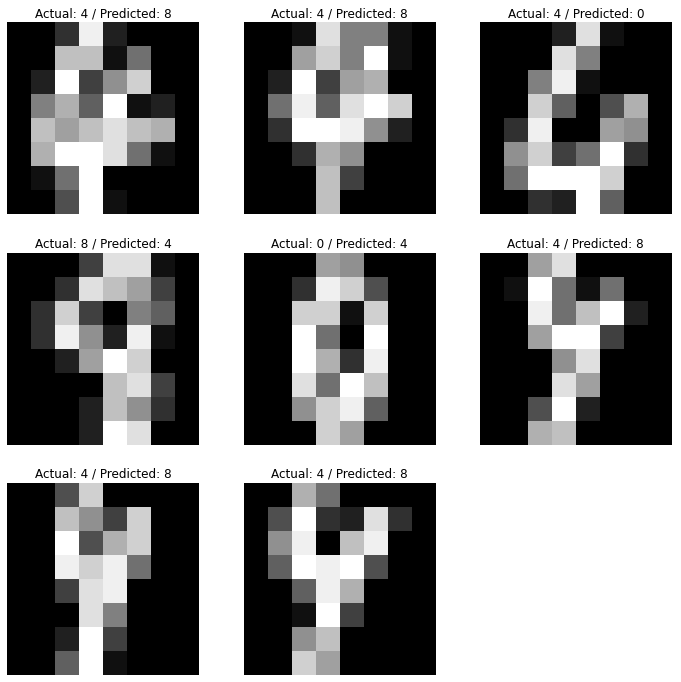

In [127]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(misclassified_indexes):
        ax.imshow(X[misclassified_indexes[i]].reshape(8,8), cmap='gray')
        ax.set_title('Actual: ' + str(y[misclassified_indexes[i]])
                     + ' / Predicted: '  + str(labels[misclassified_indexes[i]]))
        ax.axis('off')
    else:
        ax.axis('off')
plt.show()
